In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
import pylab as plt
from matplotlib import rc
from pylab import figure, show, legend, xlabel, ylabel


import statsmodels.api as sm
import scipy.stats as stats
from scipy.io import loadmat


In [2]:
df = pd.read_csv("/home/rodolfoch/Computacional/Actividad6/hua_data.csv")

In [3]:
df.head()

,anio,mes,dia,hora(utc),altura(mm)
0,2016,1,1,0,861
1,2016,1,1,1,986
2,2016,1,1,2,992
3,2016,1,1,3,883
4,2016,1,1,4,690


In [4]:
df.columns

Index(['anio', 'mes', 'dia', 'hora(utc)', 'altura(mm)'], dtype='object')

In [5]:
df.columns= ['Año','Mes','Día','Hora(utc)','Altura(mm)']

In [6]:
df.dtypes

Año            int64
Mes            int64
Día            int64
Hora(utc)      int64
Altura(mm)    object
dtype: object

In [7]:
from datetime import datetime
df['Fecha']= df.apply(lambda x:datetime.strptime("{0} {1} {2} {3}".format(x[u'Año'],x[u'Mes'], x[u'Día'], x[u'Hora(utc)']), "%Y %m %d %H"),axis=1)

In [8]:
df.head()

,Año,Mes,Día,Hora(utc),Altura(mm),Fecha
0,2016,1,1,0,861,2016-01-01 00:00:00
1,2016,1,1,1,986,2016-01-01 01:00:00
2,2016,1,1,2,992,2016-01-01 02:00:00
3,2016,1,1,3,883,2016-01-01 03:00:00
4,2016,1,1,4,690,2016-01-01 04:00:00


In [9]:
df['Altura(mm)']= pd.to_numeric(df['Altura(mm)'], errors='coerce') #para pasar la altura de ovbjetc a float

In [10]:
df.dtypes

Año                    int64
Mes                    int64
Día                    int64
Hora(utc)              int64
Altura(mm)           float64
Fecha         datetime64[ns]
dtype: object

In [11]:
df.head()

,Año,Mes,Día,Hora(utc),Altura(mm),Fecha
0,2016,1,1,0,861.0,2016-01-01 00:00:00
1,2016,1,1,1,986.0,2016-01-01 01:00:00
2,2016,1,1,2,992.0,2016-01-01 02:00:00
3,2016,1,1,3,883.0,2016-01-01 03:00:00
4,2016,1,1,4,690.0,2016-01-01 04:00:00


In [12]:
df_filtered = df[df['Altura(mm)'] == 0.0] #buscando las alturas cero

In [13]:
df_filtered.head()

,Año,Mes,Día,Hora(utc),Altura(mm),Fecha
3025,2016,5,6,1,-0.0,2016-05-06 01:00:00
3510,2016,5,26,6,0.0,2016-05-26 06:00:00
3895,2016,6,11,7,0.0,2016-06-11 07:00:00
5622,2016,8,22,6,0.0,2016-08-22 06:00:00
8105,2016,12,3,17,-0.0,2016-12-03 17:00:00


In [14]:
df_new = df[(df['Fecha'] > '2016-05-06 01:00:00') & (df['Fecha'] <= '2016-08-22 06:00:00')] #intervalo de fechas

In [15]:
df_new.head()

,Año,Mes,Día,Hora(utc),Altura(mm),Fecha
3026,2016,5,6,2,-28.0,2016-05-06 02:00:00
3027,2016,5,6,3,76.0,2016-05-06 03:00:00
3028,2016,5,6,4,277.0,2016-05-06 04:00:00
3029,2016,5,6,5,519.0,2016-05-06 05:00:00
3030,2016,5,6,6,736.0,2016-05-06 06:00:00


In [16]:
df_new.tail()

,Año,Mes,Día,Hora(utc),Altura(mm),Fecha
5618,2016,8,22,2,630.0,2016-08-22 02:00:00
5619,2016,8,22,3,321.0,2016-08-22 03:00:00
5620,2016,8,22,4,74.0,2016-08-22 04:00:00
5621,2016,8,22,5,-43.0,2016-08-22 05:00:00
5622,2016,8,22,6,0.0,2016-08-22 06:00:00


In [17]:
5622-3026

2596

In [18]:
y=df_new[u'Altura(mm)']
x=df_new[u'Fecha']

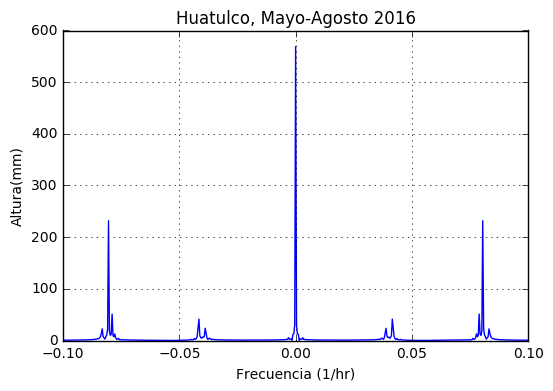

In [24]:
from scipy.fftpack import fft, fftfreq, fftshift
# number of signal points
N = 2597
# sample spacing
T = 1.0
y=df_new[u'Altura(mm)']
x=df_new[u'Fecha']
plt.ylabel('Altura(mm)')
plt.title('Huatulco, Mayo-Agosto 2016')
plt.xlabel('Frecuencia (1/hr)')
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.xlim(-0.1,0.1)
plt.grid()
plt.show()

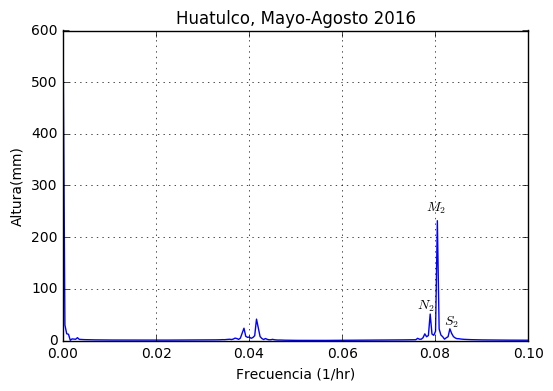

In [25]:
from scipy.fftpack import fft, fftfreq, fftshift
# number of signal points
N = 2597
# sample spacing
T = 1.0
y=df_new[u'Altura(mm)']
x=df_new[u'Fecha']
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.xlim(0.0,0.1)
plt.grid()
plt.ylabel('Altura(mm)')
plt.title('Huatulco, Mayo-Agosto 2016')
plt.xlabel('Frecuencia (1/hr)')
plt.text(0.076,61, '$N_2$')
plt.text(0.078,250, '$M_2$')
plt.text(0.082,30, '$S_2$')
plt.show()

In [21]:
#0.079  es  12.65   es  N2

#0.0805 es 12.422  es  M2

#0.083  es 12.04  es  S2

#

1/0.04

25.0